# Projet 3 - Concevez une application au service de la santé publique - Part 1

## Table des matières

### 1. [Introduction](#Section1)
- 1.1 [Contexte](#1.1-Contexte)
- 1.2 [Objectives](#1.2-Objectives)
- 1.3 [Les Données](#1.3-Les-Données)
- 1.4 [Des Examples](#1.4-Des-Examples)

### 2. [Les Imports](#Section2)
- 2.1 [Les libraries](#2.1-Les-libraries)
- 2.2 [Les paramètres de sortie](#2.2-Les-paramètres-de-sortie)
- 2.3 [Les données](#2.3-Les-données)
- 2.4 [Conclusions](#2.4-Conclusions)

### 3. [Les Variables](#Section3)
- 3.1 [Les définitions](#3.1-Les-définitions)
    - 3.1.1 [Informations nutritionnelles](#3.1.1-Informations-nutritionnelles-(minimale))
    - 3.1.2 [Nutri-Score](#3.1.2-Nutri-Score)
    - 3.1.3 [NOVA classification](#3.1.3-NOVA-classification)
    - 3.1.4 [Eco-score](#3.1.4-Eco-score)
- 3.2 [Types des variables](#3.2-Types-des-variables-(entre-autres))
- 3.3 [Les fonctions](#3.3-Les-fonctions)
- 3.4 [Nettoyer le jeu de données](#3.4-Nettoyer-le-jeu-de-données)
    - 3.4.1 [Les Catégories d'Alimentation](#3.4.1-Les-Catégories-d'Alimentation)
    - 3.4.2 [Les informations nutritionelles](#3.4.2-Les-informations-nutritionelles-(minimales))
    - 3.4.3 [Les classements et scores d'alimentation](#3.4.3-Les-classements-et-scores-d'alimentation-(déjà-mis-en-oeuvre))
    - 3.4.4 [Le code à barré](#3.4.4-Le-code-à-barré)
- 3.5 [Les Exports](#3.5-Les-Exports)
    
### 4. [Conclusions](#Section4)
- 4.1 [Les catégories alimentaires](#4.1-Les-catégories-alimentaires)
- 4.2 [Les informations nutritionelles](#4.2-Les-informations-nutritionelles-(minimales))
- 4.3 [Les classements et scores d'alimentation](#4.3-Les-classements-et-scores-d'alimentation)
- 4.4 [Les codes à barré](#4.4-Les-codes-à-barré)

<a id="Section1"></a>
## 1. Introduction à la problématique

### 1.1 Contexte
Répondre à un appel à projets pour **trouver des idées innovantes d’applications en lien avec l'alimentation** lancé par l'agence "Santé publique France".
Proposer une idée d’application.

### 1.2 Objectives

#### Concevoir une application à partir des données Open Food Facts

1) **Traiter le jeu de données** afin de **repérer des variables pertinentes** pour les traitements à venir. **Automatiser ces traitements** pour éviter de répéter ces opérations.

    Le programme doit fonctionner si la base de données est légèrement modifiée (ajout d’entrées, par exemple).

2) Tout au long de l’analyse, **produire des visualisations** afin de mieux comprendre les données. **Effectuer une analyse univariée** pour chaque variable intéressante, afin de synthétiser son comportement.

    L’appel à projets spécifie que l’analyse doit être simple à comprendre pour un public néophyte. Soyez donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.

3) **Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés** pour vérifier la significativité des résultats.

4) **Élaborer une idée d’application**. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

5) **Rédiger un rapport d’exploration et pitcher votre idée** durant la soutenance du projet.

### 1.3 Les Données

**Le jeu de données publiques d'OpenFoodFacts** : https://world.openfoodfacts.org/
> "Open Food Facts est une base de données sur les produits alimentaires faite par tout le monde, pour tout le monde."

Informations sur les definitions des differents variables : https://static.openfoodfacts.org/data/data-fields.txt

Les données d'OpenFoodFacts viennent des utilisatuers qui renseignent des informations via une application. Aujourd'hui, il y a plus que 1.9 Million produits d'alimentation renseignés. Cependent **un grand nombre d'entrées sont probablement erronées**, car l'application ne fait pas de contrôle ou de test pour les entrées de l'utilisateur. 



### 1.4 Des Examples

* **Kaggle** :
    https://www.kaggle.com/openfoodfacts/world-food-facts/kernels?datasetId=20&sortBy=dateRun&language=Python
* **How much sugar?** : https://howmuchsugar.in/
* **PNNS** : https://www.mangerbouger.fr/PNNS
   > "Lancé en 2001, le Programme national nutrition santé (PNNS) est un plan de santé publique visant à améliorer l’état de santé de la population en agissant sur l’un de ses déterminants majeurs : la nutrition. Pour le PNNS, la nutrition s’entend comme l’équilibre entre les apports liés à l’alimentation et les dépenses occasionnées par l’activité physique."
    * **Nutriscore** : https://www.mangerbouger.fr/PNNS/Guides-et-documents/Le-Nutri-Score-pour-mieux-manger-en-un-coup-d-oeil

<a id="Section2"></a>
## 2. Les Imports et paramètres de sortie

### 2.1 Les libraries

In [1]:
#imports: regular expresssions, operating system, math operations
#import re,os,math
import os, random

#data modules
import numpy as np
import pandas as pd
import scipy as sp

#graphic modules
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set() #sets the theme of seaborn
#creates static png images of the plots within the notebook (other option: 'notebook' for interactive plots)
%matplotlib inline 

### 2.2 Les paramètres de sortie
Ici, on peut choisir, si on veut voir les détails et sauvegarder les images, la data, etc.

In [3]:
print_details = True
save_figures = True
save_data = True

### 2.3 Les données

#### 2.3.1 Télécharger les données

In [4]:
PATH_TO_DATA = os.getcwd()
openfoodfacts_df =  pd.read_csv(PATH_TO_DATA +'\\en.openfoodfacts.org.products.csv', sep = '\t')

c:\users\bookj\environments\jupenv\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,8,13,19,20,21,22,23,27,28,29,31,52,64) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### 2.3.2 Un premier regard
Vérifier que l'import c'est bien passé et regarder la taille du jeu de données et à quel point il est rempli.

In [5]:
#check that the import went well
openfoodfacts_df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1624390765,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
num_inds, num_cols = openfoodfacts_df.shape
print("Shape: ", num_inds, num_cols)

Shape:  1907318 186


In [7]:
#look at the column names
openfoodfacts_df.columns.values

array(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'abbreviated_product_name', 'generic_name', 'quantity',
       'packaging', 'packaging_tags', 'packaging_text', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'origins', 'origins_tags', 'origins_en', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo',
       'cities', 'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text', 'allergens',
       'allergens_en', 'traces', 'traces_tags', 'traces_en',
       'serving_size', 'serving_quantity', 'no_nutriments', 'additives_n',
       'additives', 'additives_tags', 'additives_en',
       'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil',
       'ingredients_from_palm_oil_tags',
       

In [8]:
# look at the columns that have a mixed data type
if print_details:
    print(openfoodfacts_df.columns.values[[0,8,13,19,20,21,22,23,27,28,29,31,52,64]])

#set the dtype to 'string' for the columns that have mixed dtypes, in order to avoid any problems further down the line.
for c in openfoodfacts_df.columns.values[[0,8,13,19,20,21,22,23,27,28,29,31,52,64]] :
    openfoodfacts_df[c] = openfoodfacts_df[c].astype('string')
    
#if I want to call the columns as a method their names cannot contain a '-'. Change the '-' to a '_'.
openfoodfacts_df.columns = openfoodfacts_df.columns.str.replace('-', '_')

['code' 'abbreviated_product_name' 'packaging_text' 'origins'
 'origins_tags' 'origins_en' 'manufacturing_places'
 'manufacturing_places_tags' 'emb_codes' 'emb_codes_tags'
 'first_packaging_code_geo' 'cities_tags' 'ingredients_from_palm_oil_tags'
 'brand_owner']


In [9]:
column_completeness = openfoodfacts_df.notna().mean().sort_values(ascending = False)
y = 100 * column_completeness.values
x  = list(range(len(y)))

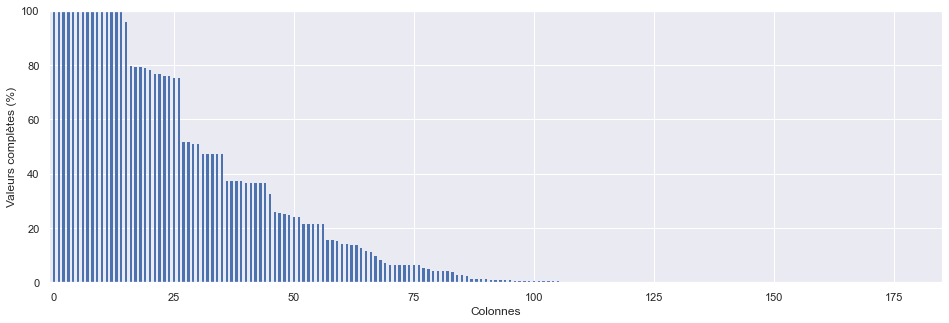

In [10]:
plt.figure(figsize=(16,5))
plt.bar(x, y, linewidth = 0, width = 0.5)
plt.xlabel("Colonnes")
plt.ylabel("Valeurs complètes (%)")
plt.xlim([-1, max(x)])
plt.ylim([0, max(y)])
if save_figures:
    plt.savefig(os.getcwd() + '\\Figures\\' + 'Intégralité_Des_Données', dpi = 200)
plt.show()

### 2.4 Conclusions
* Il y a **plus que 1.9 Millions de produits alimentaires** dans la base de données. Mais, il y a surement beaucoups des valeurs mal renseignées (valuers manquantes et erronées) et on peut assumer qu'il a des entrées dupliquées, car les données sont renseingées par des utilisateurs et ne sont que vérifier au fur et à mesure.
* Il y a **186 colonnes / variables**, mais **beaucoup sont peu peuplées**. La base de donnée d'OpenFoodFacts continue à évoluer.
* En finale, **seule une petit fraction des données sera utilisable** (pour des analyses). Mais 1% de 2 Million reste 20 000.

<a id = "Section3"></a>
## 3. Les Variables 

### 3.1 Les définitions

### 3.1.1 Informations nutritionnelles (minimale)

Dans beaucoup de pays, c'est obligatoire de déclarer des valeurs nutrionnelles pour la plupart des produits alimentaires. En générale, la déclaration nutrionnelle obligatoire inclut au minimum pour 100g ou 100ml:

<table style = "display:inline-block" style="text-align:left">
    <tr><th style="text-align:left" colspan = "2" > Les valeurs nutritionnelles (minimales)</th></tr>
    <tr> 
        <td style="text-align:left">la valeur énergétique (en kJ et kcal) </td>
        <td style="text-align:left">&rArr; energy_100g / energy-kcal_100g </td>
    </tr>
    <tr>
        <td style="text-align:left">matières grasses (g) <br>
            &bull; dont acies gras saturés (g) </td>
        <td style="text-align:left">&rArr; fat_100g <br>
            &bull; &rArr; saturated-fat_100g </td>
    </tr>
    <tr>
        <td style="text-align:left">glucides (g) <br>
            &bull; dont sucres (g) </td>
        <td style="text-align:left">&rArr; carbohydrates_100g <br>
            &bull; &rArr; sugars_100g </td>
    </tr>
    <tr>
        <td style="text-align:left">protéines (g)</td>
        <td style="text-align:left">&rArr; proteins_100g</td>
    </tr>
    <tr>
        <td style="text-align:left">sel (g) </td>
        <td style="text-align:left">&rArr; salt_100g</td>
    </tr>
</table>

#### L'énergie nutrionelle venant des macro-nutriments

On peut estimer la partie de l'énergie nutritionelle d'un produit alimentaire ventant des macro-nutriments (matières grasses, glucides et protéins). De base, cette énergie computée est représente l'énergie nutrionelle minimum d'un produit. Un produit peut contenir des autres nutriments qui contribuent à l'énergie nutitionelle qui ne font pas nécessairement partie des macro-nutriments, comme les alcools et les fibres alimentaires.

<table style = "display:inline-block" style="text-align:left">
    <tr><th style="text-align:left" colspan = "2" > Macro-nutriments (qui font partie des valeurs nutritionelles minimales)</th></tr>
    <tr>
        <td style="text-align:left">glucides (à l'exception des polyols)</td>
        <td style="text-align:left">17 kJ/g - 4 kcal/g</td>
    </tr>
    <tr>
        <td style="text-align:left">polyols* (qui font partie des glucides)</td>
        <td style="text-align:left">10 kJ/g - 2.4 kcal/g</td>
    </tr>
    <tr>
        <td style="text-align:left">erythritol**** (est un type de polyol)</td>
        <td style="text-align:left">0 kJ - 0 kcal/g</td>
    </tr>
    <tr>
        <td style="text-align:left">protéins</td>
        <td style="text-align:left">17 kJ/g - 4 kcal/g</td>
    </tr>
    <tr>
        <td style="text-align:left">matières grasses</td>
        <td style="text-align:left">37 kJ/g - 9 kcal/g</td>
    </tr>
</table>
    
<br>
    
<table style = "display:inline-block" style="text-align:left">
    <tr><th style="text-align:left" colspan = "2"> Nutriments pas prise en compte pour l'énergie computée</th></tr>
    <tr>
    <tr>
        <td style="text-align:left">différents formes de salatrim** </td>
        <td style="text-align:left">25 kJ - 6 kcal/g</td>
    </tr>
    <tr>
        <td style="text-align:left">alcool (éthanol) </td>
        <td style="text-align:left">29 kJ - 7 kcal/g</td>
    </tr>
    <tr>
        <td style="text-align:left">acides organiques*** </td>
        <td style="text-align:left">13 kJ/g - 3 kcal/g</td>
    </tr>
    <tr>
        <td style="text-align:left">fibres alimentaires</td>
        <td style="text-align:left">8 kJ - 2 kcal/g</td>
    </tr>
</table>

\*polyols: ce sont des alcools de sucre, souvent utilisées comme des édulscorants
(https://en.wikipedia.org/wiki/Polyol)

\*\* salatrim: un additif alimentaire, accepté comme substitut de graisse moins calorique
(https://en.wikipedia.org/wiki/Salatrim)

\*\*\* acides organiques: utilisés dans la conservation des aliments
(https://en.wikipedia.org/wiki/Organic_acid)

\*\*\*\* erythritol: un alcool de sucre, utilisé comme additif alimentaire et substitut du sucre
(https://en.wikipedia.org/wiki/Erythritol)
 

#### Relations entre ces données:

Donnant les définitions et les informations sur les valeurs nutritionnelles ont peut constater certains règles et rélations entre les données qui peuvent servir comme vérification de la qualité des données et aider à éliminer des entrées erronées.

* Toutes ces variables doivent être positives.
* Les variables (à l'exception de l'energie) ne doivent pas excéder 100g.
* Egalment, leur somme ne doit pas excéder 100g non plus.
    * _fat_100g_ + _carobhydrates_100g_ + _proteins_100g_ + _sel_100g_ &le; 100g
        * _saturated_fat_100g_ &le; _fat_100g_
        * _sugars_100g_ &le; _carbohydrates_100g_
* L'énergie doit être cohérent avec les quantities des autres variables*:
    * _energy_100g_ = 4.184 _energy-kcal_100g_
        * 1 kcal = 4.184 kJ
    * 37 _fat_100g_ + 17 _carbohydrates_100g_ + 17 _proteins_100g_ &le; _energy_100g_
        * 1 _fat_100g_ = 37 _energy_100g_ = 9 _energy-kcal_100g_ 
        * 1 _carbohydrates_100g_ = 17 _energy_100g_ = 4 _energy_kcal_100g_
        * 1 _proteins_100g_ = 17 _energy_100g_ = 4 _energy_kcal_100g_
    * pour 100g: _energy_100_ &le; 3700 (kJ) (la matière grasse a le plus d'énergie par gramme)

\* On note que les conversions des quantitiés de nutriments en énergie nutritionelle sont simplifiées et arrondies. On peut attendre qu'il va avoir des variations.

**Sources**:
* https://fr.wikipedia.org/wiki/Information_nutritionnelle
* https://www.legislation.gov.uk/uksi/1996/1499/schedule/7/made
* Règlement (UE) n o  1169/2011 du Parlement européen et du Conseil du 25 octobre 2011 concernant l’information des consommateurs sur les denrées alimentaires (https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX%3A02011R1169-20180101)



### 3.1.2 Nutri-Score

Sources:
* https://www.santepubliquefrance.fr/determinants-de-sante/nutrition-et-activite-physique/articles/nutri-score

#### Nutri-Score, c'est quoi ?
* Un logo apposé en face avant des emballages qui informe sur la qualité nutritionnelle des produits sous une forme simplifiée et complémentaire à la déclaration nutritionnelle obligatoire (fixée par la réglementation européenne)
* Basé sur une échelle de 5 couleurs : du vert foncé au orange foncé
* Associé à des lettres allant de A à E pour optimiser son accessibilité et sa compréhension par le consommateur

#### Comment est-il attribué ?
* Le logo est attribué sur la base d’un score prenant en compte pour 100 gr ou 100 mL de produit, la teneur :
    * en nutriments et aliments à favoriser (fibres, protéines, fruits, légumes, légumineuses, fruits à coques, huile de colza, de noix et d’olive),
    * et en nutriments à limiter (énergie, acides gras saturés, sucres, sel).
* Après calcul, le score obtenu par un produit permet de lui attribuer une lettre et une couleur.

#### Variables nécessaire pour calculer le NutriScore:

<table style = "display:inline-block" style="text-align:left">
    <tr> 
        <td style="text-align:left">la valeur énergétique (kJ) </td>
        <td style="text-align:left">&rArr; energy_100g </td>
    </tr>
    <tr>
        <td style="text-align:left">sucres (g) </td>
        <td style="text-align:left">&rArr; sugars_100g </td>
    </tr>
    <tr>
        <td style="text-align:left">acies gras saturés (g) </td>
        <td style="text-align:left">&rArr; saturated-fat_100g </td>
    </tr>
    <tr>
        <td style="text-align:left">sodium (mg) </td>
        <td style="text-align:left">&rArr; sodium_100g / 1000 </td>
    </tr>
    <tr>
        <td style="text-align:left">fruits, légumes, légumineuses, fruits à coque et huiles de colza, de noix et d’olive (%) </td>
        <td style="text-align:left">&rArr; fruits-vegetables-nuts_100g <br>(fruits-vegetables-nuts-estimate_100g) </td>
    </tr>
    <tr>
        <td style="text-align:left">fibres (g) </td>
        <td style="text-align:left">&rArr; fiber_100g </td>
    </tr>
    <tr>
        <td style="text-align:left">protéines (g)</td>
        <td style="text-align:left">&rArr; proteins_100g</td>
    </tr>

</table>

#### Relations entre les variables
* Les variables necessaire pour calculer le NutriScore qui font partie de l'information nutritionnelle minimale
    * energy_100g, sugars_100g, saturated-fat_100g, proteins_100g
* La quantité de sodium peut être dérivée de la quantité de sel
    * _sodium_100g_ = 0.4 _salt_100g_
* Les variables utilisées pour le NutriScore qui ne font pas partie de l'information nutritionnelle minimale
    * fibres_100g, fruits-vegetables-nuts_100g


### 3.1.3 NOVA classification

Sources: https://fr.wikipedia.org/wiki/NOVA_(nutrition)

#### La NOVA classification, c'est quoi ?
La classification NOVA est une répartition des aliments en quatre groupes en fonction du degré de transformation des matières dont ils sont constitués:
* Groupe 1 : Aliments peu ou non transformés
    * Ces aliments peuvent être soumis à un ou plusieurs traitements dans le but de prolonger la durée de vie ou de diversifier la préparation des aliments (grillage de graines de café, fermentation du lait pour les yaourts...) mais qui ne modifient pas intrinsèquement les propriétés nutritionnelles des aliments. Les éléments de ce groupe sont susceptibles de contenir des additifs dans le but de conserver les propriétés de l'aliment de base.
    * les viandes et poissons frais, les fruits de mer, les œufs, le lait pasteurisé, les yaourts natures, le beurre, le café, les épices, les fruits frais, pressés, réfrigérés, congelées, séchés, les céréales, champignons, légumes, tubercules, noix et graines

* Groupe 2 : Ingrédients culinaires
    * Ces produits sont obtenus grâce à diverses transformations physiques et chimiques (pressage, raffinage, meulage...) des aliments du groupe 1. Ils ne sont que rarement consommés en l'absence d'aliments du groupe 1. Ils servent en effet à préparer, assaisonner et cuire les aliments du groupe 1. Ils ont des propriétés et usages nutritionnels très différents de ceux du groupe 1.
    * le sucre, les huiles végétales, les beurres et graisses animales, le lard, les soupes, le vinaigre, le lait de noix de coco, la fécule de maïs, les amidons, le sirop d'érable et le miel
* Groupe 3 : Aliments transformés
    * Ce sont des aliments constitués d'un ou deux ingrédients, qui ont subi des transformations assez simples, et qui sont fabriqués à partir d'un aliment du groupe 1 auquel on a ajouté un aliment du groupe 2, dans l'objectif de leur conférer une durée de vie plus longue, d'améliorer ou de modifier leur goût, et également d'augmenter leur résistance aux microbes.
    * Les boissons alcoolisées telles que le cidre ou le vin, qui sont réalisées à partir de la fermentation d'aliments du premier groupe, font partie du groupe 3.

* Groupe 4 : Aliments ultra-transformé
    * Les aliments du groupe 4 sont, quant à eux, réalisés généralement à partir de 5 ingrédients ou plus, dans le cadre d'une transformation industrielle complexe. Ces aliments ont pour caractéristiques d'être riches en sucres, en sel et en matières grasses ajoutées. Ils sont, le plus souvent, constitués de substances industrielles qui n'ont pas d'équivalent domestique (caséine, lactosérum, huiles hydrogénées...) et contiennent en général des additifs, afin notamment d'améliorer le goût des aliments et de camoufler les saveurs indésirables des produits finaux incorporés tels que les colorants, les émulsifiants, ou encore les édulcorants.


### 3.1.4 Eco-score

Sources: https://docs.score-environnemental.com/

#### Eco-score, c'est quoi ?
L'Eco-score est un indicateur représentant l'impact environnemental des produits alimentaires. Il classe les produits en 5 catégories (A, B, C, D, E), de l'impact le plus faible, à l'impact le plus élevé. L'impact environnemental tient compte de plusieurs facteurs sur la pollution de l'air, des eaux, des océans, du sol, ainsi que les impacts sur la biosphère.

Il prend en compte :
* ingrédients spécifiques (impacts important sur la biodiversité et les écosystèmes)
* saisonnalité des ingrédients (fruits et légumes de saison, pas de serres chauffées)
* impacts environnementaux (impacts de la production, du transport et des emballages des ingrédients, sur la biodiversité notamment; analyse du cycle de vie du produit)
* emballages (materiaux, recyclabilité, fin de vie, séparabilité)
* provenance & transparence (origine des ingrédients)
* modes de production (labels environnementaux, pêche, etc.)

* On note que ce score est expérimental. Il vient d'être mis en oeuvre et est encore en train d'être améliorer.

### 3.2 Types des variables (entre autres)

* **identificateur** : code
    * product_name (signification humaine), ... , generic_name
    
    
* variables qualitatives :
    * nominale :
        * **Type alimentation** : 
        pnns_groups_1, pnns_groups_2, categories, categories_en, categories_tags, main_category ,main_category_en
        * **Pays** : 
        countries, countries_en, countries_tags
        * **Ingrédients** : 
        ingredients_text, additives_en, additives_tags, allergens, traces, traces_en, traces_tags, ...
        * **Etiquettes** : 
        labels, labels_en, labels_tags
        * **Emballages** :
        packaging, packaging_tags
        * **Lieu de vente / de production** :
        stores, purchase_places, manufacturing_places, manufacturing_places_tags, emb_codes, emb_codes_tags, ... 
    * ordinale  :
        * **Evaluation** : 
        nutriscore_grade, nova_group, ecoscore_grade_fr
        
        
* variables quantitatives :
    * continue :
        * **Valeurs Nutritionelles** : 
        energy_100g, energy_kcal_100g, fat_100g, saturated-fat_100g, carbohydrates_100g, sugars_100g, saturated-fat_100g, proteins_100g, salt_100g, sodium_100g, ... , fiber_100g, ... ,'fruits-vegetables-nuts-estimate_100g', fruits-vegetables-nuts_100g, ... , energy-kj_100g, ... , alcohol_100g, ... , **xxx_100g**
    * discrète : 
        * **Nombre de type d'ingrédients** :
        additives_n, ingredients_from_palm_oil_n, ingredients_that_may_be_from_palm_oil_n
        * **Score de l'Evaluation** :
        nutriscore_score, nutrition-score-fr_100g, ecoscore_score_fr
    
      
Dans le fichier .txt , il y a d'autre noms / tags listés.

### 3.3 Les fonctions

In [11]:
def sample_column(data, column, sample_size=15) :
    s = data[column]
    comp = s.count()/len(s)
    print(f"Column '{column}' is {100*comp.round(2)} % complete.")
    print()
    print(s.describe())
    print()
    list_unique = list(s.unique())
    len_unique = len(list_unique)
    sample_size = sample_size if sample_size <= len_unique else len_unique
    for i in random.sample(list_unique, k = sample_size) :
        print()
        print(i)
        print()
        print("Items with this entry: ")
        print(data[data[column] == i]['product_name'])
        print()   

In [12]:
def compare_column_completeness(data, columnlist):
    data = data[columnlist].copy()
    output = []
    for i, c in enumerate(columnlist) :
        tmp = data.dropna(subset = [c]).count()
        l = tmp[c]
        tmp = tmp / l
        output.append(tmp.values)
    output = np.array(output)
    sns.heatmap(output, annot = True, xticklabels = columnlist, yticklabels = [ci + "_100%" for ci in columnlist], cmap="YlGn")

In [13]:
def compare_two_related_columns(data_df, columns, lines = [], vlines = [], savefigure = False, **kwargs):
    '''Lines and vlines are list of tuples containing the data and **kwargs to lines added on the scatter plot. 
    The data for lines is slope, offset of the curve and for vlines simply the position of the vertical line.'''
    ax = data_df.plot.scatter(x=columns[0], y =columns[1], c='blue', **kwargs)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xdata = list(xlim)
    for ll in list(lines):
        if isinstance(ll, tuple) :
            m = ll[0]
            b = ll[1]
            kwargs_l = ll[2] if len(ll) > 2 else {}
            plt.plot(xdata, [m*i + b for i in xdata], **kwargs_l)
        else :
            m = lines[0]
            b = lines[1]
            kwargs_l = lines[2] if len(lines) > 2 else {}
            plt.plot(xdata, [m*i + b for i in xdata], **kwargs_l)     
    vlines = [vlines,] if not isinstance(vlines,list) else list(vlines)
    for vl in vlines:
        if isinstance(vl,tuple) :
            v = vl[0]
            kwargs_v = vl[1] if len(vl) > 1 else {}
            plt.axvline(v, **kwargs_v)
        else :
            v = vl
            kwargs_v = vlines[1] if len(list(vlines)) > 1 else {}  
            plt.axvline(v, **kwargs_v)
    if savefigure:
        plt.savefig(os.getcwd() + '\\Figures\\' + 'ColumnComparison_' + columns[0] + '_vs_' + columns[1], dpi = 200)                   
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)

### 3.4 Nettoyer le jeu de données

Regarder que sont les variables avec un taux de remplissage plus ou moins élévé et voir si elle peuvent servir à créer une application en lien avec l'alimentation.

In [14]:
column_completeness[(column_completeness <= 0.6) & (column_completeness >= 0.4)]

brands                       0.514968
brands_tags                  0.514934
image_nutrition_small_url    0.510036
image_nutrition_url          0.510036
categories                   0.472468
categories_tags              0.472466
main_category_en             0.472466
categories_en                0.472466
main_category                0.472466
dtype: float64

In [15]:
col_name = 'fruits_vegetables_nuts_100g'
sample_column(openfoodfacts_df, col_name, sample_size=15)

Column 'fruits_vegetables_nuts_100g' is 0.0 % complete.

count    8795.000000
mean       34.111718
std        36.461854
min         0.000000
25%         0.000000
50%        20.300000
75%        60.000000
max       100.000000
Name: fruits_vegetables_nuts_100g, dtype: float64


70.2

Items with this entry: 
1737158    Alubia roja cocida
Name: product_name, dtype: object


19.5

Items with this entry: 
747952                                   Tarte aux Poireaux
748009            Tarte aux Poireaux, gratinée à l'emmental
748184    Merlu blanc compotée à la provençale, linguine...
948645                               Tout simplement mangue
Name: product_name, dtype: object


36.3

Items with this entry: 
945276     Sorbet pommes vertes avec morceaux de pomme
1636609            Sauce bolognaise et fromages Italie
Name: product_name, dtype: object


47.8

Items with this entry: 
774611    Mouliné de légumes verts
Name: product_name, dtype: object


3.8

Items with this entry: 
787997      Pou

### 3.4.1 Les Catégories d'Alimentation

On va utiliser les variables **'pnns_groups_1' et 'pnns_groups_2'**, car les variables 'categories', 'main_category', etc. ... ne sont pas reneignées d'une façon cohérente. Les variables de type 'categories' sont des listes qui contiennet plusieurs catégories, des fois dans différents languages. Les variables de type 'main_category' n'ont qu'une catégorie, mais elles ne sont pas toutes dans la même language. Un préfix donne la language de la catégorie. Pour 'main_category_en' les catégories en anglais n'ont pas de préfix. On a l'impression que les utilisateurs peuvent renseigner n'import quelles catégories. On peut imaginer que ces 'tags' vont être traîter eventuellement.

In [16]:
openfoodfacts_df['pnns_groups_1'].unique()

array(['unknown', 'Fat and sauces', 'Composite foods', 'Sugary snacks',
       'Fruits and vegetables', 'Fish Meat Eggs', 'Beverages',
       'Milk and dairy products', 'Cereals and potatoes', 'Salty snacks',
       'Alcoholic beverages', nan, 'sugary-snacks'], dtype=object)

###  Les catégories PNNS

Les deux catégories PNNS (pnns_groups_1 et pnns_groups_2) contiennent aussi les valeurs : 'unknown' et 'nan'. Alors, même si le taux de remplissage de pnns_groups_1 et pnns_groups_2 est indiqué 100%, la catégorie des éléments n'est pas nécessairement connue / renseignée. De plus, dans ces deux variables, il y a des doublons : 
* nan = 'unknown'
* 'sugary-snacks' = 'Sugary snacks'
* 'Pizza pies and quiche' = 'Pizza pies and quiches'
* 'pastries' = 'Pastries'
On va corriger ces valeurs.

In [17]:
openfoodfacts_df.replace(to_replace={'pnns_groups_1' : {np.nan:'unknown', 
                                                        'sugary-snacks':'Sugary snacks'},
                                     'pnns_groups_2' : {np.nan:'unknown', 
                                                        'Pizza pies and quiche' : 'Pizza pies and quiches', 
                                                        'pastries' : 'Pastries'}}, 
                         inplace = True)
if print_details :
    print(openfoodfacts_df[['pnns_groups_1', 'pnns_groups_2']].describe())

       pnns_groups_1 pnns_groups_2
count        1907318       1907318
unique            11            40
top          unknown       unknown
freq         1174482       1174480


In [18]:
openfoodfacts_df[['pnns_groups_1','pnns_groups_2']].value_counts(sort=False)

pnns_groups_1            pnns_groups_2                   
Alcoholic beverages      Alcoholic beverages                   16780
Beverages                Artificially sweetened beverages       9361
                         Fruit juices                           9694
                         Fruit nectars                          1369
                         Plant-based milk substitutes           5816
                         Sweetened beverages                   23078
                         Teas and herbal teas and coffees       1631
                         Unsweetened beverages                 10485
                         Waters and flavored waters             6851
Cereals and potatoes     Bread                                 22023
                         Breakfast cereals                      9507
                         Cereals                               39951
                         Legumes                                8949
                         Potatoes            

### 3.4.2 Les informations nutritionelles (minimales)

On va regarder de plus près ces valeurs nutritionelles, car ce sont les valeurs le plus renseignées et elles sont souvent obligatoirement affichées sur les étiquettes des produits.

energy_100g, energy_kcal_100g, energy-kj_100g, fat_100g, saturated-fat_100g, carbohydrates_100g, sugars_100g, proteins_100g, salt_100g, sodium_100g

In [19]:
nutritional_values = ['energy_100g', 'energy_kcal_100g', 'energy_kj_100g', 
                      'fat_100g', 'saturated_fat_100g', 
                      'carbohydrates_100g', 'sugars_100g', 
                      'proteins_100g', 
                      'salt_100g', 'sodium_100g',
                      'alcohol_100g', 'fiber_100g']

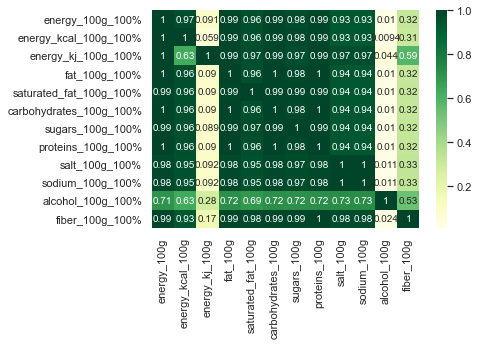

In [20]:
compare_column_completeness(openfoodfacts_df, nutritional_values)

### Éliminer les erreurs évidentes

On va **éliminer** tous les éléments avec des **valeurs manquantes et les erreurs évidentes**:

* les variables (sauf pour les énergétiques) avec les valeurs supérieure à 100g
* les variables avec une entrée négative
* une quantité d'énergie de plus de 3780kJ (La quantité maximale d'énergie qu'un produit peut avoir, c'est 3700kJ, dans ce cas, il s'agirait de 100% de matières grasses. On utilise 3780 kJ pour le max au ca où les calcules était fait pour 9kcal, i.e. pour prendre en compte des petites déviations liées au )
* si l'énergie en kcal ne correspond pas à celui en kJ. Ca indique que l'utilisateur n'a pas bien renseignés les données. (1 kcal = 4.184 kJ). On va donner une marge d'erreur de 10%.
* plus de sucres que de glucides
* plus de acies gras saturés que de matières grasses

De plus on va supprimer la variable 'energy_kj_100g', car elle n'apporte pas d'information supplémentaire et n'est pas vraiment bien renseignée. C'est le doublon de 'energy_100g' et les valeurs ont l'air de correspondre à celui de 'energy_100g'.

#### Les nécessaires constants

In [21]:
KCAL_TO_KJ = 4.184
KJ_TO_KCAL = 1/KCAL_TO_KJ
MAX_G = 100
MAX_KJ = 3780
MAX_KCAL = round(MAX_KJ*KJ_TO_KCAL)
NA_IN_SALT = 0.4

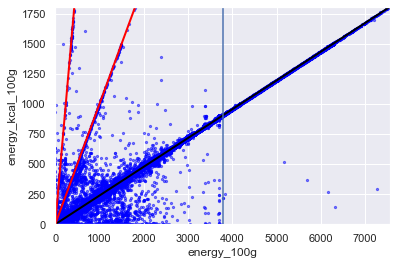

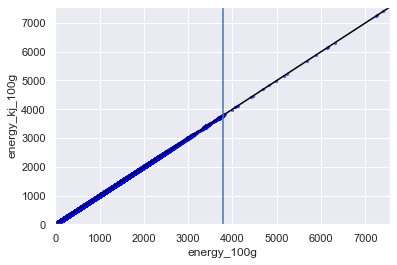

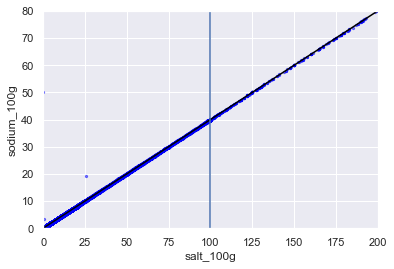

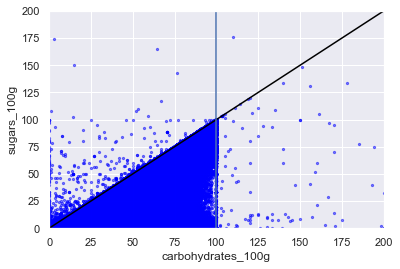

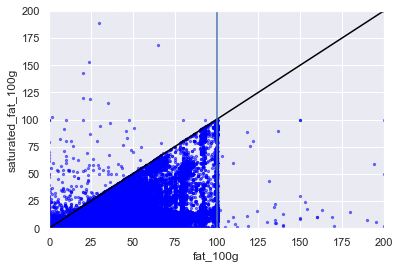

In [22]:
compare_two_related_columns(openfoodfacts_df, ['energy_100g', 'energy_kcal_100g'],
                            [(KJ_TO_KCAL, 0, {'color' : 'black', 'linewidth' : 2}),
                             (1, 0, {'color' : 'red', 'linewidth' : 2}),
                             (KCAL_TO_KJ, 0, {'color' : 'red', 'linewidth' : 2})],
                            [MAX_KJ],
                            xlim = [0,2*MAX_KJ], ylim = [0,2*MAX_KCAL], marker = ".", alpha = 0.5)
compare_two_related_columns(openfoodfacts_df, ['energy_100g', 'energy_kj_100g'], 
                            [(1, 0, {'color' : 'black'})], 
                            [MAX_KJ], 
                            xlim = [0,2*MAX_KJ], ylim = [0,2*MAX_KJ], marker = ".", alpha = 0.5)
compare_two_related_columns(openfoodfacts_df, ['salt_100g', 'sodium_100g'], 
                            [(NA_IN_SALT, 0, {'color' : 'black'})], 
                            [MAX_G], 
                            xlim = [0,2*MAX_G], ylim = [0,2*MAX_G*NA_IN_SALT], marker = ".", alpha = 0.5)
compare_two_related_columns(openfoodfacts_df, ['carbohydrates_100g', 'sugars_100g'], 
                            [(1, 0, {'color' : 'black'})], 
                            [MAX_G],
                            xlim = [0,2*MAX_G], ylim = [0,2*MAX_G], marker = ".", alpha = 0.5)
compare_two_related_columns(openfoodfacts_df, ['fat_100g', 'saturated_fat_100g'], 
                            [(1, 0, {'color' : 'black'})], 
                            [MAX_G],
                            xlim = [0,2*MAX_G], ylim = [0,2*MAX_G], marker = ".", alpha = 0.5)

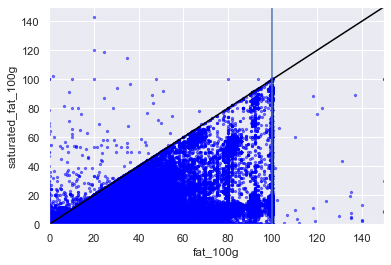

In [23]:
compare_two_related_columns(openfoodfacts_df, ['fat_100g', 'saturated_fat_100g'], 
                            [(1, 0, {'color' : 'black'})], 
                            [MAX_G],
                            xlim = [0,150], ylim = [0,150], savefigure = save_figures,marker = ".", alpha = 0.5)

In [24]:
nutritional_values = ['energy_100g', 'energy_kcal_100g', 
                      'fat_100g', 'saturated_fat_100g', 
                      'carbohydrates_100g', 'sugars_100g', 
                      'proteins_100g', 
                      'salt_100g', 'sodium_100g']
nutritional_values_df = openfoodfacts_df[nutritional_values].copy()#.dropna(axis = 0)

In [25]:
is_empty = np.where(nutritional_values_df.isnull().sum(axis=1) >= 1, True, False)

pd.Series(~is_empty).value_counts()#/pd.Series(~is_empty).value_counts().sum()

True     1307976
False     599342
dtype: int64

In [26]:
nutritional_values_df = nutritional_values_df.loc[~is_empty].copy()

In [27]:
exceeds_100g = np.array([True if any(i > 100 or i < 0 for i in a) else False for a in zip(
                                                    nutritional_values_df.fat_100g,
                                                    nutritional_values_df.carbohydrates_100g,
                                                    nutritional_values_df.proteins_100g,
                                                    nutritional_values_df.salt_100g,
                                                    nutritional_values_df.sugars_100g,
                                                    nutritional_values_df.saturated_fat_100g,
                                                    nutritional_values_df.sodium_100g)])

exceeds_energy = np.array([True if i > 3780 or i < 0 else False for i in nutritional_values_df.energy_100g])

exceeds_carbohydrates = np.array([True if i > j else False for i, j in zip(nutritional_values_df.sugars_100g,
                                                                           nutritional_values_df.carbohydrates_100g)])

exceeds_fat = np.array([True if i > j else False for i, j in zip(nutritional_values_df.saturated_fat_100g,
                                                                 nutritional_values_df.fat_100g)])

energies_mismatch = np.array([True if i < 0.9 * KJ_TO_KCAL * j or i > 1.1 * KJ_TO_KCAL * j else False for i, j in zip(
                                                                    nutritional_values_df.energy_kcal_100g,
                                                                    nutritional_values_df.energy_100g)])

select = ~(exceeds_100g | exceeds_energy | exceeds_carbohydrates | exceeds_fat | energies_mismatch)


In [28]:
pd.Series(select).value_counts()#/pd.Series(select).value_counts().sum()

True     1295445
False      12531
dtype: int64

In [29]:
nutritional_values_df = nutritional_values_df.loc[select].copy()

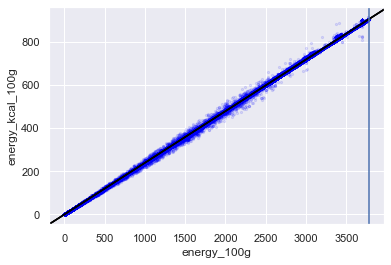

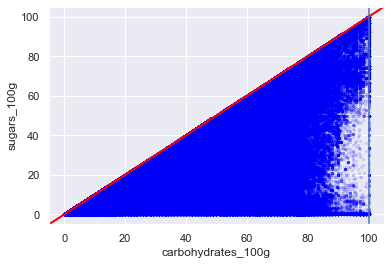

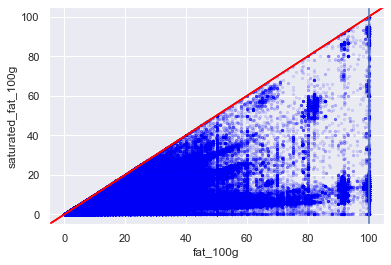

In [30]:
if print_details :
    compare_two_related_columns(nutritional_values_df, ['energy_100g', 'energy_kcal_100g'], 
                                [KJ_TO_KCAL, 0, {'color': 'black'}], MAX_KJ, marker = ".", alpha = 0.1)
    compare_two_related_columns(nutritional_values_df, ['carbohydrates_100g', 'sugars_100g'], 
                                [1, 0, {'color' : 'red'}], MAX_G, marker = ".", alpha = 0.1)
    compare_two_related_columns(nutritional_values_df, ['fat_100g', 'saturated_fat_100g'], 
                                [1, 0, {'color' : 'red'}], MAX_G, savefigure = save_figures, marker = ".", alpha = 0.1)

### La somme des macro-nutriments

De plus, on va vérifier que la somme des macro-nutriments (matières grasses, glycides, protéins) et du sel ne surpasse pas les 100g non-plus. Pour ça, on va créer une variable 'g_sum', qui est la somme des macro-nutriments plus le sel.
On va **éliminer les élements pour lequels le somme est plus grand que 102g**. (On va laisser une marge de 2% d'erreur, pour tenir compte des erreurs d'arrondissement.

count    1.295445e+06
mean     5.254046e+01
std      3.173928e+01
min      0.000000e+00
25%      2.414782e+01
50%      5.030000e+01
75%      8.519000e+01
max      3.960000e+02
Name: g_sum, dtype: float64


Text(0, 0.5, 'Fréquence')

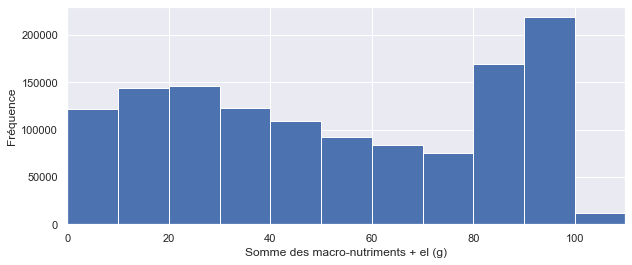

In [31]:
nutritional_values_df['g_sum'] = nutritional_values_df.fat_100g \
                               + nutritional_values_df.carbohydrates_100g \
                               + nutritional_values_df.proteins_100g \
                               + nutritional_values_df.salt_100g


print(nutritional_values_df['g_sum'].describe())
    
fig, ax = plt.subplots(figsize = (10,4))
ax.set_xlim(0,110)
plt.hist(nutritional_values_df['g_sum'], bins=[0,10,20,30,40,50,60,70,80,90,100.1,400])
plt.xlabel("Somme des macro-nutriments + el (g)")
plt.ylabel("Fréquence")

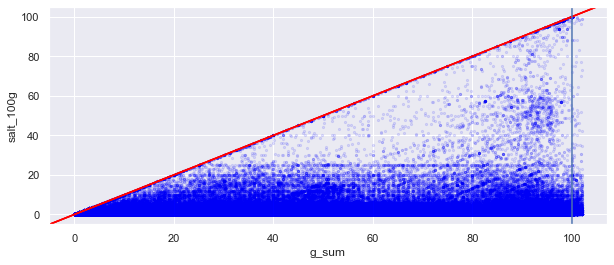

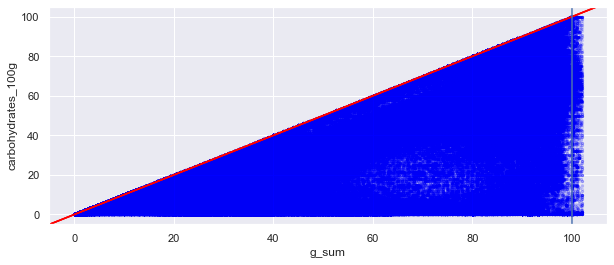

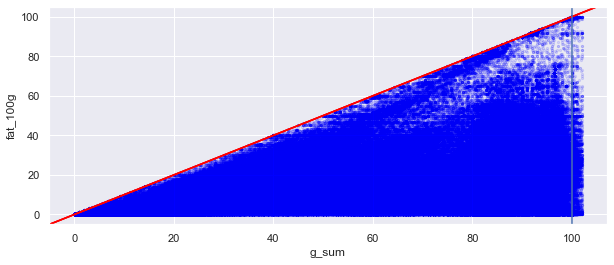

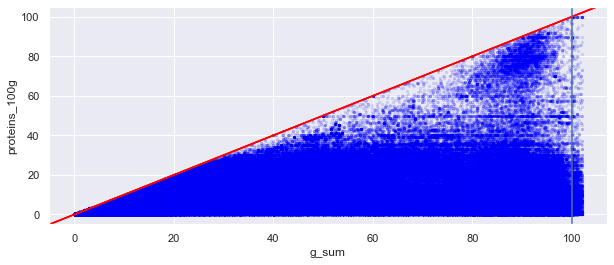

In [32]:
nutritional_values_df = nutritional_values_df.loc[nutritional_values_df.g_sum <= 102 ].copy()

if print_details :
    compare_two_related_columns(nutritional_values_df, ['g_sum', 'salt_100g'], 
                                (1,0, {'color' : 'red'}), MAX_G, marker = ".", alpha = 0.1, figsize = (10,4))
    compare_two_related_columns(nutritional_values_df, ['g_sum', 'carbohydrates_100g'], 
                                (1,0, {'color' : 'red'}), MAX_G, marker = ".", alpha = 0.1, figsize = (10,4))
    compare_two_related_columns(nutritional_values_df, ['g_sum', 'fat_100g'], 
                                (1,0, {'color' : 'red'}), MAX_G, marker = ".", alpha = 0.1, figsize = (10,4))
    compare_two_related_columns(nutritional_values_df, ['g_sum', 'proteins_100g'], 
                                (1,0, {'color' : 'red'}), MAX_G, marker = ".", alpha = 0.1, figsize = (10,4))

### L'énergie nutrionelle venant des macro-nutriments

On va estimer la partie de l'énergie nutritionelle ventant des macro-nutriments (matières grasses, glucides et protéins). On peut penser que  cette énergie computée représente l'énergie nutritionelle minimum d'un produit, car un produit peut contenir des autres nutriments qui contribuent à l'énergie nutitionelle qui ne font pas néceassairement partie des macro-nutriments, comme les alcools et les fibres alimentaires. Cette notion est une piège: les polyols y inclut l'erythriol sont contient dans les glycides, mais ils ont une valeur énergique plus bas que des autres glucides (10 kJ et 0 kJ au lieu de 17 kJ). De plus ce ne sont pas simplement des additifs. Il y a des produits comme les chewing-gums, qui peuvent avoir un taux de polyols plus que 80%. On note aussi qu'on peut achète l'erythriol pur en pudre. C'est utilisé comme le sucre. 

Il faut aussi tenir compte que les conversions des quantitiés de nutriments en énergie nutritionelle sont fait avec des tableaux de conversation simplifiés. Les conversions entre kJ et kcal peuvent aussi introduire des erreures. C'est surtout le cas pour les différents types de glucides. (Fructose : 15.4 kJ, Glucose : 15.8 kJ, Succrose (grannulé) : 16.2 kJ, ... si on regarde spécifiquement ces sucres). 

On doit aussi noté que les réglementations ou conventions sur ce que est inclue dans la table nutritionnelle peut varier entre les différents pays. Par example, aux Etat-Unis, les fibres alimentaires sont inclus dans les glucides, mais en UE ils ne le sont pas. Les fibres alimentaires est aussi un example où la définition peut varier un peu entre les différents pays.

Pour avoir une idéé comment les différents nutriments contribuent à l'énergie, on va les tracer contre l'énergie renseignée. 

#### Eliminer les valeurs qui sont en dehors bornes raissonables:
Après, on va les éléments pour lesquels les quantités des nutriments ne sont pas cohérentes avec l'énergie nutitionelle renseignée. Pour les différents nutriments on donne une plague d'énergie nutitionelle qu'ils peuvent avoir. 

#### Les plagues d'énergie pour les nutriments

* Les glucides: 0 - 18.7 kJ
    * Les sucres : 15.3 - 18.7 kJ
    * Les autre glucides (= non-sucres) : 0 - 18.7 kJ
* La matière grasse : 36.2 - 37.8 kJ
* Les protéins : 16.5 - 17.5 kJ
* Le "reste" (ce que ne fait pas partie des nutriments en haute) : 0 - 37.8 kJ

#### Les régles d'élimination supplémentaires

* La minimum énergie totale est : 36.2 * matière grasse + 16.5 * protéins + 15.3 kJ * sucres  <= énergie totale renseignée (<= 3780 kJ)
* La maximum énergie totale est : 37.8 * matière grasse + 17.5 * protéins + 18.7 kJ * glucides + 37.8 * "reste" >= énergie totale renseignée (>= 0 kJ)

* La maximum énergie du "reste" : énergie totale renseignée - minimum énergie totale >= 0 kJ
* La minimum énergie du "reste" : énergie totale renseignée - 37.8 * matière grasse + 17.5 * protéins + 18.7 kJ * glucides <= 37.80 * "reste"

In [33]:
nutritional_values_df['others_100g'] = 100 - nutritional_values_df.g_sum
nutritional_values_df['othercarbs_100g'] = nutritional_values_df.carbohydrates_100g - nutritional_values_df.sugars_100g

nutritional_values_df['energy_min_computed'] = 36.2 * nutritional_values_df.fat_100g \
                                         + 15.3 * nutritional_values_df.sugars_100g \
                                         + 16.5 * nutritional_values_df.proteins_100g
nutritional_values_df['energy_max_computed'] = 37.8 * nutritional_values_df.fat_100g \
                                         + 18.7 * nutritional_values_df.carbohydrates_100g \
                                         + 17.5 * nutritional_values_df.proteins_100g \
                                         + 37.8 * nutritional_values_df.others_100g

nutritional_values_df['energy_others_max'] = nutritional_values_df.energy_100g - nutritional_values_df.energy_min_computed
nutritional_values_df['energy_others_min'] = nutritional_values_df.energy_100g - 37.8 * nutritional_values_df.fat_100g \
                                                - 18.7 * nutritional_values_df.carbohydrates_100g \
                                                - 17.5 * nutritional_values_df.proteins_100g

In [34]:
energy_sugar_mismatch = np.array([True if i > j / 15.3 or i > (3780 - j) / (37.8-18.7)  else False for i, j in zip(
                                        nutritional_values_df.sugars_100g,
                                        nutritional_values_df.energy_100g)])

energy_fat_mismatch = nutritional_values_df.fat_100g.values > nutritional_values_df.energy_100g.values / 36.2

energy_proteins_mismatch = np.array([True if i > j / 16.5 or i > (3780 - j) / (37.8-17.5)  else False for i, j in zip(
                                        nutritional_values_df.proteins_100g,
                                        nutritional_values_df.energy_100g)])

energy_carbs_mismatch = nutritional_values_df.carbohydrates_100g.values > \
                        (3780 - nutritional_values_df.energy_100g.values) / (37.8-18.7)
energy_othercarbs_mismatch = nutritional_values_df.othercarbs_100g.values > \
                                (3780 - nutritional_values_df.energy_100g.values) / (37.8-18.7)

energy_toolow = nutritional_values_df.energy_100g.values < nutritional_values_df.energy_min_computed.values
energy_toohigh = nutritional_values_df.energy_100g.values > nutritional_values_df.energy_max_computed.values

energy_others_toolow =  nutritional_values_df.energy_others_max.values < 0
energy_others_toohigh = nutritional_values_df.energy_others_min.values > 37.8 * nutritional_values_df.others_100g.values 

select = ~(energy_sugar_mismatch | energy_fat_mismatch | energy_proteins_mismatch | \
           energy_carbs_mismatch | energy_othercarbs_mismatch | \
           energy_toolow  | energy_toohigh | \
           energy_others_toolow | energy_others_toohigh )

In [35]:
pd.Series(select).value_counts()#/pd.Series(select).value_counts().sum()

True     1233924
False      55984
dtype: int64

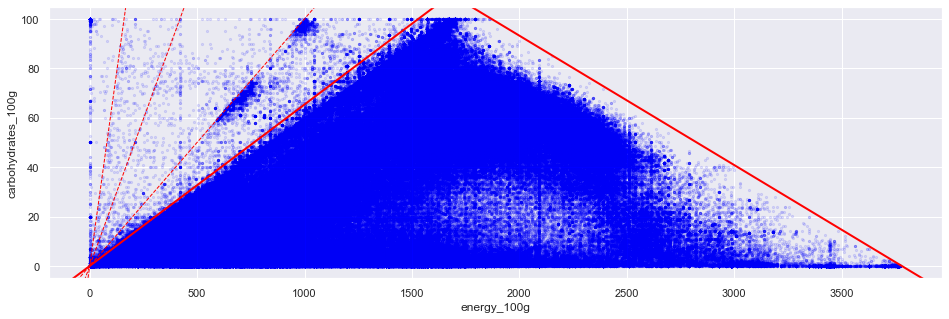

In [36]:
compare_two_related_columns(nutritional_values_df[select], ['energy_100g', 'carbohydrates_100g'], 
                            [(1/15.3, 0, {'color' : 'red', 'linewidth' : 2}), 
                             (-1/(37.8-18.7), 3780/(37.8-18.7), {'color' : 'red', 'linewidth' : 2}),
                             (1/10, 0, {'color' : 'red', 'linewidth' : 1, 'linestyle' : '--'}),
                             (1/4.2, 0, {'color' : 'red', 'linewidth' : 1, 'linestyle' : '--'}),
                             (1/1.6, 0, {'color' : 'red', 'linewidth' : 1, 'linestyle' : '--'})],
                             marker = ".", alpha = 0.1, figsize = (16,5))

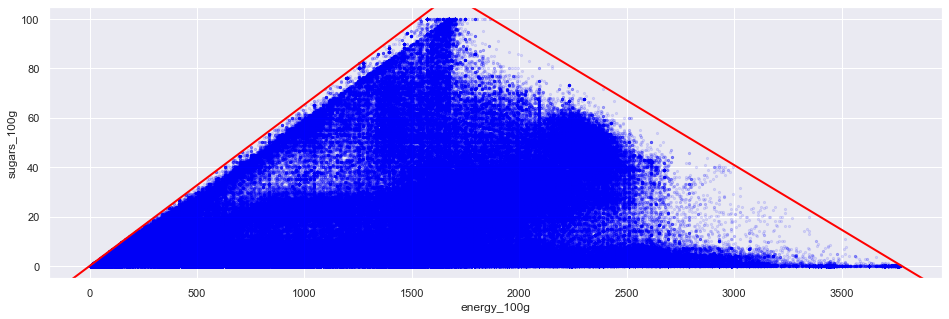

In [37]:
compare_two_related_columns(nutritional_values_df[select], ['energy_100g', 'sugars_100g'], 
                            [(1/15.3, 0, {'color' : 'red', 'linewidth' : 2}), 
                             (-1/(37.8-18.7), 3780/(37.8-18.7), {'color' : 'red', 'linewidth' : 2})],
                             marker = ".", alpha = 0.1, figsize = (16,5))

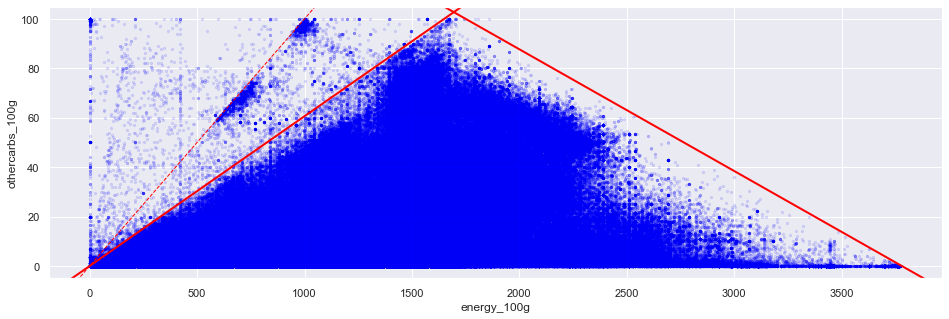

In [38]:
compare_two_related_columns(nutritional_values_df[select], ['energy_100g', 'othercarbs_100g'], 
                            [(1/16.5, 0, {'color' : 'red', 'linewidth' : 2}),
                             (-1/(37.8-17.5), 3780/(37.8-17.5) , {'color' : 'red', 'linewidth' : 2}),
                             (1/10, 0, {'color' : 'red', 'linewidth' : 1, 'linestyle' : '--'})],
                             marker = ".", alpha = 0.1, figsize = (16,5))

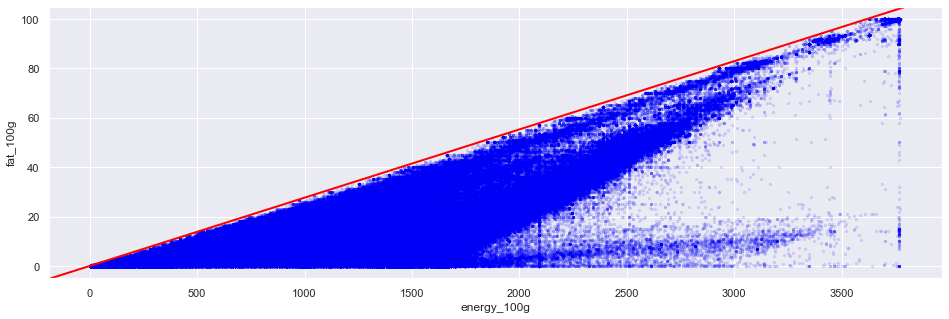

In [39]:
compare_two_related_columns(nutritional_values_df[select], ['energy_100g', 'fat_100g'], 
                            [(1/36.2, 0, {'color' : 'red', 'linewidth' : 2})],
                             marker = ".", alpha = 0.1, figsize = (16,5))

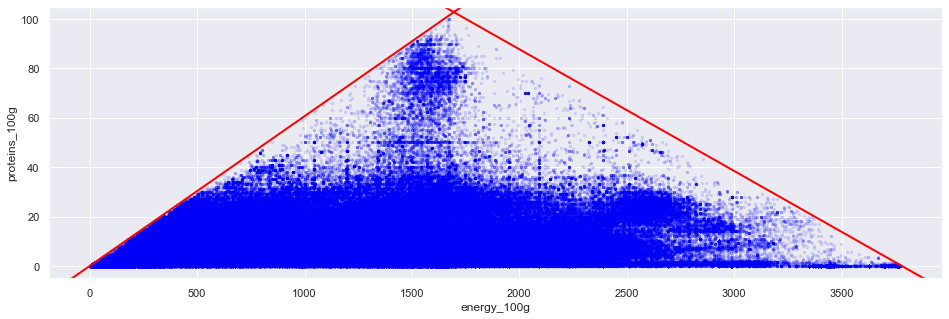

In [40]:
compare_two_related_columns(nutritional_values_df[select], ['energy_100g', 'proteins_100g'], 
                            [(1/16.5, 0, {'color' : 'red', 'linewidth' : 2}),
                             (-1/(37.8-17.5), 3780/(37.8-17.5) , {'color' : 'red', 'linewidth' : 2})],
                             marker = ".", alpha = 0.1, figsize = (16,5))

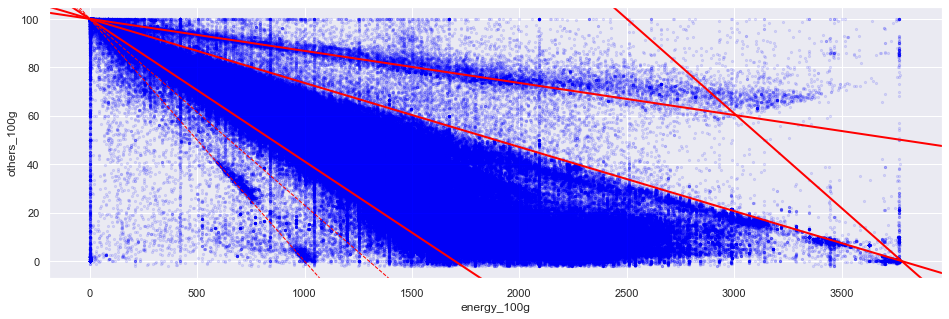

In [41]:
compare_two_related_columns(nutritional_values_df[select], ['energy_100g', 'others_100g'], 
                            [(-1/37.8, 100, {'color' : 'red', 'linewidth' : 2}),
                             (-1/13, 100, {'color' : 'red', 'linewidth' : 1, 'linestyle' : '--'}),
                             (-1/17, 100, {'color' : 'red', 'linewidth' : 2}),
                             (-1/10, 100, {'color' : 'red', 'linewidth' : 1, 'linestyle' : '--'}),
                             (-1/(2*37.8), 100, {'color' : 'red', 'linewidth' : 2}),
                            (-1/(37.8-25), 3780/(37.8-25), {'color' : 'red', 'linewidth' : 2})],
                             marker = ".", alpha = 0.1, figsize = (16,5))

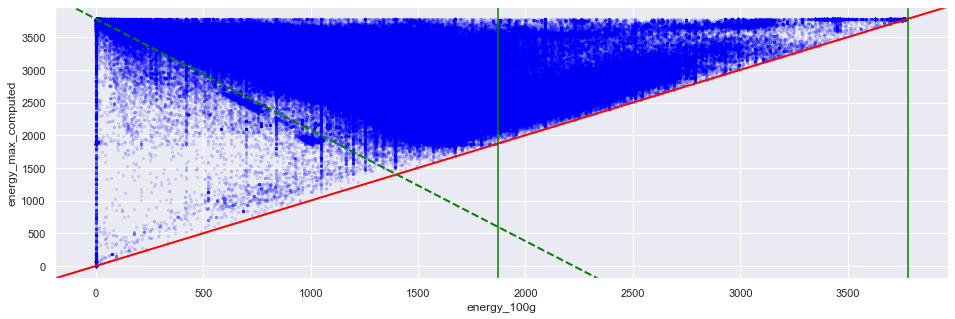

In [42]:
compare_two_related_columns(nutritional_values_df[select], ['energy_100g', 'energy_max_computed'], 
                            [(1, 0, {'color' : 'red', 'linewidth' : 2}),
                             (-1.7, 3780, {'color' : 'green', 'linewidth' : 2, 'linestyle' : '--'})],
                            [(1870, {'color':'green'}),(3780,{'color':'green'})],
                             marker = ".", alpha = 0.1, figsize = (16,5))

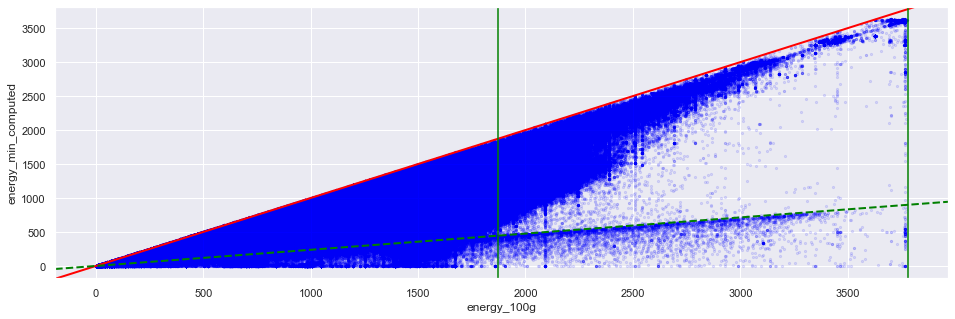

In [43]:
compare_two_related_columns(nutritional_values_df[select], ['energy_100g', 'energy_min_computed'], 
                            [(1, 0, {'color' : 'red', 'linewidth' : 2}),
                             (1/4.2, 0, {'color' : 'green', 'linewidth' : 2, 'linestyle' : '--'})],
                            [(1870, {'color':'green'}),(3780,{'color':'green'})],
                             marker = ".", alpha = 0.1, figsize = (16,5))

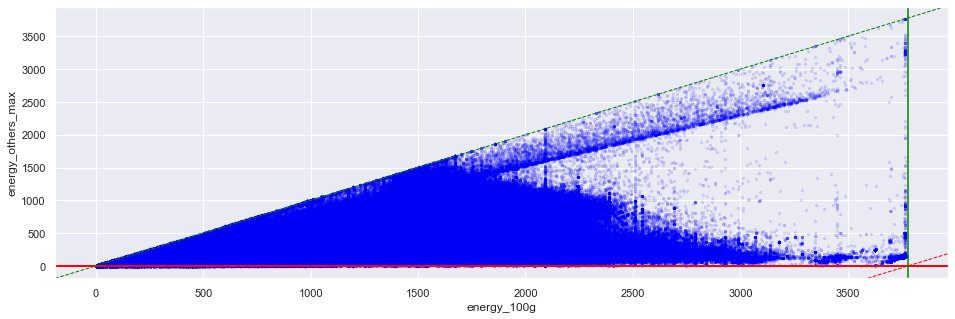

In [44]:
compare_two_related_columns(nutritional_values_df[select], ['energy_100g', 'energy_others_max'], 
                            [(0, 0, {'color' : 'red', 'linewidth' : 2, 'linestyle' : '-'}),
                             (1, -3780, {'color' : 'red', 'linewidth' : 1, 'linestyle' : '--'}),
                             (1, 0, {'color' : 'green', 'linewidth' : 1, 'linestyle' : '--'})],
                            [(3780, {'color':'green'})],
                             marker = ".", alpha = 0.1, figsize = (16,5))

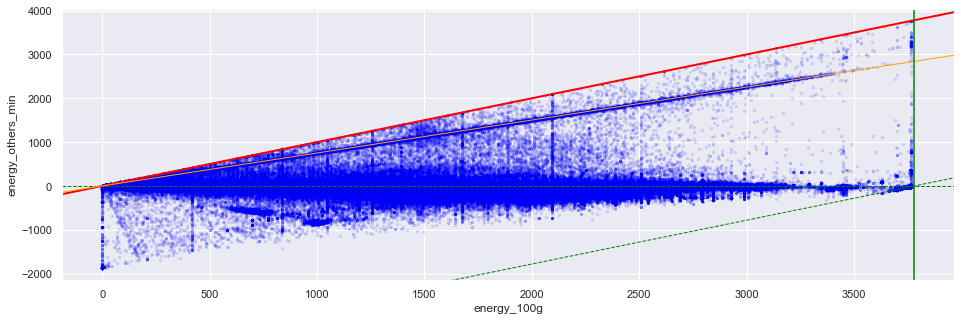

In [45]:
compare_two_related_columns(nutritional_values_df[select], ['energy_100g', 'energy_others_min'], 
                            [(0, 0, {'color' : 'green', 'linewidth' : 1, 'linestyle' : '--'}),
                             (1, -3780, {'color' : 'green', 'linewidth' : 1, 'linestyle' : '--'}),
                             (1, 0, {'color' : 'red', 'linewidth' : 2, 'linestyle' : '-'}),
                             (1/1.33, 0, {'color' : 'orange', 'linewidth' : 1, 'linestyle' : '-'})],
                            [(3780, {'color':'green'})],
                             marker = ".", alpha = 0.1, figsize = (16,5))

In [46]:
nutritional_values_df = nutritional_values_df[select].copy()


In [47]:
#look at the distribution of the data among the pnns-groups
if print_details :
    openfoodfacts_df.loc[nutritional_values_df.index]["pnns_groups_1"].value_counts() / \
        openfoodfacts_df.loc[nutritional_values_df.index]["pnns_groups_1"].value_counts().sum()

### 3.4.3 Les classements et scores d'alimentation (déjà mis en oeuvre)

Finalement, on va regarder le taux de remplissages des scores (NutriScore, Ecoscore) et des classements (Novagroup) des alimentation qui sont déjà mis en oeuvre pour aider les consommateurs à faire leur choix.

In [48]:
food_scores = ['nutriscore_score', 'nutriscore_grade','nutrition_score_fr_100g', 'nutrition_score_uk_100g',
               'nova_group','ecoscore_score_fr', 'ecoscore_grade_fr' ]

In [49]:
openfoodfacts_df[food_scores].count()

nutriscore_score           698857
nutriscore_grade           698857
nutrition_score_fr_100g    698862
nutrition_score_uk_100g         9
nova_group                 618599
ecoscore_score_fr          460726
ecoscore_grade_fr          460726
dtype: int64

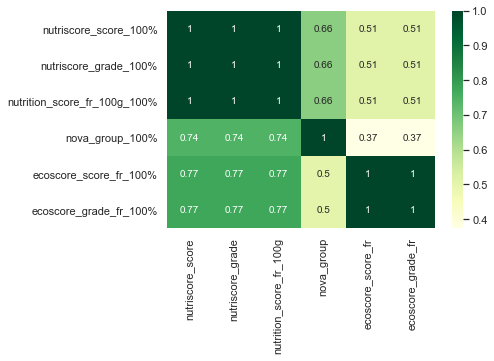

In [50]:
food_scores = ['nutriscore_score', 'nutriscore_grade','nutrition_score_fr_100g',
               'nova_group','ecoscore_score_fr', 'ecoscore_grade_fr' ]
compare_column_completeness(openfoodfacts_df, food_scores)

### Le Nutri-Score

On va essayer d'éliminer des valeurs erronées. Les scores du NutriScore donne des classements suivants:

<table style = "display:inline-block" style="text-align:left">
    <tr>
        <th style="text-align:left" colspan = "2" > Score / Points</th>
        <th style="text-align:center" rowspan = "2" > Classement </th>
    </tr>
    <tr>
        <th style="text-align:left">Aliments solides</th>
        <th style="text-align:left">Boissons</th>
    </tr>
    <tr>
        <td style="text-align:left">-15 à -1</td>
        <td style="text-align:left">Eaux</td>
        <td style="text-align:center">A</td>
    </tr>
    <tr>
        <td style="text-align:left">0 à 2</td>
        <td style="text-align:left">-15 à 1</td>
        <td style="text-align:center">B</td>
    </tr>
    <tr>
        <td style="text-align:left">3 à 10 </td>
        <td style="text-align:left">2 à 5</td>
        <td style="text-align:center">C</td>
    </tr>
    <tr>
        <td style="text-align:left">11 à 18</td>
        <td style="text-align:left">6 à 9</td>
        <td style="text-align:center">D</td>
    </tr>
    <tr>
        <td style="text-align:left">19 à 40</td>
        <td style="text-align:left">10 à 40</td>
        <td style="text-align:center">E</td>
    </tr>
</table>

On va utiliser le groupes PNNS pour aider à faire les régles d'élimination. On va suivre le tableau en haute pour les boissons et les soilides (= les non-'known' et non-boissons). Pour les 'unknown' on va donner les bornes le plus large entre les solides et boissons.

Les 'unknown' :
* Pour A : score <= 1 
* Pour B : score <= 1
* Pour C : 2 <= score <= 10
* Pour D : 6 <= score <= 18
* Pour E : 10 <= score


In [51]:
#check if nutriscore_score and nutriscore_score_fr_100g are the same. they are
(openfoodfacts_df['nutriscore_score'] - openfoodfacts_df['nutrition_score_fr_100g']).value_counts(sort=False)

0.0    698857
dtype: int64

In [52]:
openfoodfacts_df.nutriscore_grade.unique()

array([nan, 'd', 'b', 'a', 'c', 'e'], dtype=object)

In [53]:
openfoodfacts_df[openfoodfacts_df.pnns_groups_1 != 'unknown'].nutriscore_grade.sort_values().value_counts(sort = False).sum()

583498

In [54]:
nutriscore_values = ['nutriscore_score', 'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2']

In [55]:
nutriscore_values_df = openfoodfacts_df[nutriscore_values].copy()

In [56]:
is_empty = np.where(nutriscore_values_df.isnull().sum(axis=1) >= 1, True, False)

pd.Series(~is_empty).value_counts()/pd.Series(~is_empty).value_counts().sum()

False    0.633592
True     0.366408
dtype: float64

In [57]:
nutriscore_values_df = nutriscore_values_df.loc[~is_empty].copy()

In [58]:
is_beverage = nutriscore_values_df.pnns_groups_1 == 'Beverages'
is_unknown = nutriscore_values_df.pnns_groups_1 == 'unknown'
is_food = ~(is_beverage | is_unknown)

is_water = nutriscore_values_df.pnns_groups_2 == 'Waters and flavored waters'

is_catA = nutriscore_values_df.nutriscore_grade == 'a'
is_catB = nutriscore_values_df.nutriscore_grade == 'b'
is_catC = nutriscore_values_df.nutriscore_grade == 'c'
is_catD = nutriscore_values_df.nutriscore_grade == 'd'
is_catE = nutriscore_values_df.nutriscore_grade == 'e'


catA_beverage_mismatch = (is_beverage & is_catA) & ( ~is_water | \
                                                    (nutriscore_values_df.nutriscore_score > 1) | \
                                                    (nutriscore_values_df.nutriscore_score < -15))
catB_beverage_mismatch = (is_beverage & is_catB) & ((nutriscore_values_df.nutriscore_score > 1) | \
                                                    (nutriscore_values_df.nutriscore_score < -15))
catC_beverage_mismatch = (is_beverage & is_catC) & ((nutriscore_values_df.nutriscore_score > 5) | \
                                                    (nutriscore_values_df.nutriscore_score < 2))
catD_beverage_mismatch = (is_beverage & is_catD) & ((nutriscore_values_df.nutriscore_score > 9) | \
                                                    (nutriscore_values_df.nutriscore_score < 6))
catE_beverage_mismatch = (is_beverage & is_catE) & ((nutriscore_values_df.nutriscore_score > 40) | \
                                                    (nutriscore_values_df.nutriscore_score < 10))

beverage_score_mismatch = catA_beverage_mismatch | catB_beverage_mismatch | catC_beverage_mismatch | \
                            catD_beverage_mismatch | catE_beverage_mismatch


catA_food_mismatch = (is_food & is_catA) & ((nutriscore_values_df.nutriscore_score > -1) | \
                                            (nutriscore_values_df.nutriscore_score < -15))
catB_food_mismatch = (is_food & is_catB) & ((nutriscore_values_df.nutriscore_score > 2) | \
                                            (nutriscore_values_df.nutriscore_score < 0))
catC_food_mismatch = (is_food & is_catC) & ((nutriscore_values_df.nutriscore_score > 10) | \
                                            (nutriscore_values_df.nutriscore_score < 3))
catD_food_mismatch = (is_food & is_catD) & ((nutriscore_values_df.nutriscore_score > 18) | \
                                            (nutriscore_values_df.nutriscore_score < 11))
catE_food_mismatch = (is_food & is_catE) & ((nutriscore_values_df.nutriscore_score > 40) | \
                                            (nutriscore_values_df.nutriscore_score < 19))

food_score_mismatch = catA_food_mismatch | catB_food_mismatch | catC_food_mismatch | \
                        catD_food_mismatch | catE_food_mismatch


catA_unknown_mismatch = (is_unknown & is_catA) & ((nutriscore_values_df.nutriscore_score > 1) | \
                                                  (nutriscore_values_df.nutriscore_score < -15))
catB_unknown_mismatch = (is_unknown & is_catB) & ((nutriscore_values_df.nutriscore_score > 1) | \
                                                  (nutriscore_values_df.nutriscore_score < -15))
catC_unknown_mismatch = (is_unknown & is_catC) & ((nutriscore_values_df.nutriscore_score > 10) | \
                                                  (nutriscore_values_df.nutriscore_score < 2))
catD_unknown_mismatch = (is_unknown & is_catD) & ((nutriscore_values_df.nutriscore_score > 18) | \
                                                  (nutriscore_values_df.nutriscore_score < 6))
catE_unknown_mismatch = (is_unknown & is_catE) & ((nutriscore_values_df.nutriscore_score > 40) | \
                                                  (nutriscore_values_df.nutriscore_score < 10))

unknown_score_mismatch = catA_unknown_mismatch | catB_unknown_mismatch | catC_unknown_mismatch | \
                        catD_unknown_mismatch | catE_unknown_mismatch

select = ~(food_score_mismatch | beverage_score_mismatch | unknown_score_mismatch)

In [59]:
if print_details :
    print("The NutriScores that are mismatched :\n")
    print("Unknowns :")
    print(unknown_score_mismatch[nutriscore_values_df[is_unknown].index].value_counts())
    print()
    print("Food :")
    print(food_score_mismatch[nutriscore_values_df[is_food].index].value_counts())
    print()
    print("Beverages :")
    print(beverage_score_mismatch[nutriscore_values_df[is_beverage].index].value_counts())

The NutriScores that are mismatched :

Unknowns :
False    111064
True       4295
dtype: int64

Food :
False    539444
True        403
dtype: int64

Beverages :
False    40486
True      3165
dtype: int64


In [60]:
select.value_counts()/select.value_counts().sum()

True     0.988749
False    0.011251
dtype: float64

In [61]:
nutriscore_values_df = nutriscore_values_df.loc[select].copy()

### Les NOVA catégories
Les NOVA catégories sont une façon de classer les produits d'alimentation en fonction de leurs ingrédients (nombre, type et degrée de transformation). On va transformer les valeurs en string et donner la catégorie 'unknown' au valeurs vides.

In [62]:
openfoodfacts_df = openfoodfacts_df.astype({'nova_group' : 'string'})
openfoodfacts_df['nova_group'].describe()

count     618599
unique         4
top          4.0
freq      411446
Name: nova_group, dtype: object

In [63]:
openfoodfacts_df.replace(to_replace={'nova_group' : {np.nan:'unknown'}}, inplace = True)
openfoodfacts_df[openfoodfacts_df.nova_group != 'unknown']['nova_group'].value_counts(normalize = True)

4.0    0.665126
3.0    0.206835
1.0    0.108886
2.0    0.019153
Name: nova_group, dtype: float64

### L'eco-score
On va reagarder le taux de remplissage et la rélation entre score et classement du eco-score (ecoscore_score_fr, ecoscore_grade_fr).

In [64]:
openfoodfacts_df[['ecoscore_grade_fr','ecoscore_score_fr']].value_counts().sum()#/num_inds

460726

In [65]:
openfoodfacts_df[openfoodfacts_df.ecoscore_grade_fr == 'a'].ecoscore_score_fr.sort_values().value_counts(sort = False)

80.0     1008
81.0      871
82.0      895
83.0      810
84.0     1152
85.0     1035
86.0      361
87.0      651
88.0      790
89.0      818
90.0      685
91.0     1035
92.0      462
93.0      585
94.0      651
95.0      404
96.0      278
97.0      367
98.0      227
99.0      673
100.0     335
101.0     150
102.0     141
103.0     227
104.0     406
105.0     262
106.0     294
107.0     221
108.0     213
109.0     343
110.0      89
111.0      57
112.0     105
113.0     104
114.0      96
115.0     101
116.0     116
117.0      69
118.0      63
119.0      62
120.0      48
121.0     105
122.0      78
123.0      46
124.0      65
125.0      26
Name: ecoscore_score_fr, dtype: int64

In [66]:
openfoodfacts_df['ecoscore_grade_fr'].value_counts(normalize = True)

d    0.334713
b    0.268437
e    0.181594
c    0.177099
a    0.038157
Name: ecoscore_grade_fr, dtype: float64

In [67]:
ecoscore_values_df = openfoodfacts_df[['ecoscore_score_fr','ecoscore_grade_fr']].dropna()

### 3.4.4 Le code à barré

In [68]:
#information on the product codes
openfoodfacts_df[openfoodfacts_df.astype('string').duplicated('code', keep = False)]['code'].astype('int64').sort_values()

4565                    1
497163                  1
90493                   4
339661                  4
4566                   10
                ...      
1829702     8711200350377
484105      8716671000172
1842653     8716671000172
687122     30383354190402
687123     30383354190402
Name: code, Length: 1846, dtype: int64

In [69]:
openfoodfacts_df['code'] = openfoodfacts_df['code'].astype('string')
max_code_len = openfoodfacts_df['code'].map(len).max()

code_is_duplicated = openfoodfacts_df['code'].str.zfill(max_code_len).duplicated(keep = False)
ind_vals = openfoodfacts_df[code_is_duplicated]['code'].str.lstrip('0').sort_values(ascending = False).index.values
#.sort_values(ascending=False).head(50)#.index.values
#ind_vals
openfoodfacts_df.iloc[ind_vals[-20:],:]#.notna().sum(axis = 1)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon_footprint_from_meat_or_fish_100g,nutrition_score_fr_100g,nutrition_score_uk_100g,glycemic_index_100g,water_hardness_100g,choline_100g,phylloquinone_100g,beta_glucan_100g,inositol_100g,carnitine_100g
770,00001002,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1601626294,2020-10-02T08:11:34Z,1620642348,2021-05-10T10:25:48Z,Confiture de gratte-cul,<NA>,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497744,1002,http://world-en.openfoodfacts.org/product/1002...,prepperapp,1585141405,2020-03-25T13:03:25Z,1586162441,2020-04-06T08:40:41Z,NaN,<NA>,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279812,01002,http://world-en.openfoodfacts.org/product/0100...,prepperapp,1585139969,2020-03-25T12:39:29Z,1586162447,2020-04-06T08:40:47Z,NaN,<NA>,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279806,010011,http://world-en.openfoodfacts.org/product/0100...,halal-app-chakib,1586238266,2020-04-07T05:44:26Z,1586238266,2020-04-07T05:44:26Z,culture star,<NA>,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497676,10011,http://world-en.openfoodfacts.org/product/1001...,openfoodfacts-contributors,1619588369,2021-04-28T05:39:29Z,1619588369,2021-04-28T05:39:29Z,confiture de Charroux,<NA>,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497648,1001,http://world-en.openfoodfacts.org/product/1001...,prepperapp,1585141464,2020-03-25T13:04:24Z,1627324056,2021-07-26T18:27:36Z,Cookies d’Avoine au Chocolat,<NA>,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279805,01001,http://world-en.openfoodfacts.org/product/0100...,kiliweb,1581790061,2020-02-15T18:07:41Z,1581790062,2020-02-15T18:07:42Z,Pastas Caseras,<NA>,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,0000000001001,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1537766416,2018-09-24T05:20:16Z,1537766416,2018-09-24T05:20:16Z,NaN,<NA>,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,<NA>,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497165,100,http://world-en.openfoodfacts.org/product/100/...,openfoodfacts-contributors,1536886069,2018-09-14T00:47:49Z,1569058176,2019-09-21T09:29:36Z,Thomy Mayo,<NA>,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.5 Les Exports
On va exporter les données pertinentes et nettoyées pour pouvoir les importer et traiter dans le fichier 'exploration'.

In [70]:
if save_data:
    food_groups = ['pnns_groups_1','pnns_groups_2','nova_group']
    openfoodfacts_df[food_groups].to_csv(os.getcwd() + '\\Data\\' + "openfoodfacts_food_groups")
    nutritional_values_df.to_csv(os.getcwd() + '\\Data\\' + "openfoodfacts_nutritional_values")
    nutriscore_values_df.to_csv(os.getcwd() + '\\Data\\' + "openfoodfacts_nutriscore")
    ecoscore_values_df.to_csv(os.getcwd() + '\\Data\\' + "openfoodfacts_ecoscore")
    food_info = ['code','product_name','url']
    openfoodfacts_df[food_info].to_csv(os.getcwd() + '\\Data\\' + "openfoodfacts_food_info")

<a id = "Section4"></a>
## 4. Conclusions

### 4.1 Les catégories alimentaires

* **Les catégories PNNS vont ensemble** (pnns_groups_1 et pnns_groups_2): à l'exception de deux éléments, soit toutes les deux categories sont reseignées soit toutes les deux sont inconnues (= 'unknown').
* **38.4% des catégories PNNS sont renseignées.** Les éléments non-renseignés font partie du groupe 'unknown' = inconnu.


* **10 (+1) catégories principales** (pnns_groups_1)
* **39 (+1) sous-catégories** (pnns_groups_2)

**La structure des catégories PNNS:**
* unknown
    * unknown
* Fruits and vegetables
    * Fruits
    * Dried fruits
    * Vegetables
    * Soups
* Cereals and potatoes
    * Bread
    * Cereals
    * Breakfast cereals
    * Potatoes
    * Legumes
* Milk and dairy products
    * 'Milk and yogurt'
    * 'Cheese'
    * 'Dairy desserts'
    * 'Ice Cream'
* Fish Meat Eggs
    * 'Meat'
    * 'Processed meat'
    * 'Offals'
    * 'Fish and seafood'
    * 'Eggs'
* Fat and sauces
    * 'Dressings and sauces'
    * 'Fats'
* Salty snacks
    * 'Appetizers'
    * 'Nuts'
    * 'Salty and fatty products'
* Sugary snacks
    * 'Pastries'
    * 'Biscuits and cakes'
    * 'Chocolate products'
    * 'Sweets'
* Composite foods
    * 'One-dish meals'
    * 'Pizza pies and quiches'
    * 'Sandwiches'
* Beverages
    * 'Sweetened beverages'
    * 'Artificially sweetened beverages'
    * 'Unsweetened beverages'
    * 'Fruit juices'
    * 'Plant-based milk substitutes'
    * 'Teas and herbal teas and coffees'
    * 'Waters and flavored waters'
    * 'Fruit nectars'
* Alcoholic beverages
    * 'Alcoholic beverages'
 
 
### 4.2 Les informations nutritionelles (minimales)

* **68.6% des éléments sont non-vides**. Ca veut dire qu'il y a une valeur pour toutes les informations nutritionnelles (minimales) : énergie, matière grasse, acies gras saturés, glucides, sucres, protéins, sel (et sodium) qui sont, en générale, affichées obligatoirement sur les produits alimentaires.
* **De ces éléments, 5.7% des éléments sont écartés** parce qu'ils ont des valeurs érronées: les valeurs des variables ne sont pas cohérentes avec leurs définitions, leurs énergies nutritionnelles, la somme totale ou l'énergie nutrionnelle totale.
* **67.9% des éléments sont 'bien' renseignés**. Ce font **1 295 445 produits alimentaires** avec des informations nutionnelles potentiellement intéressantes.

* Pendent la nettoyage des données, **on peut déjà deviner certins clusters**.


### 4.3 Les classements et scores d'alimentation 

### Nutri-Score
* **36.6% des élements ont un Nutri-Score renseigné**: nutriscore_score et nutriscore_grade. Ces deux variables vont ensemble: soit toutes les deux categories sont reseignées soit toutes les deux sont vide. Le score détermine le classement.
* nutriscore_score_fr_100g est un doublon (à 5 éléments près) de nutriscore_score.
* nutriscore_score_uk_100g est effectivement vide avec que 9 éléments renseignés.
* **Des éléments renseignées, 98.9% sont 'bien' renseignés**. Leurs classement (nutriscore_grade) est cohérente avec le score (nutriscore_score).


### NOVA catégories
* **32.4% des éléments ont été attribué à une NOVA catégorie.**
* Les éléments renseignés ont la distribution suivante:
    * 1.0 : 10.9 %
    * 2.0 :  1.9 %
    * 3.0 : 20.7 %
    * 4.0 : 66.5 %


### Eco-Score
* **24.2% des éléments ont un eco-score renseigné**.
* Les éléments renseignés ont la distribution suivante:
    * a :  3.8 %
    * b : 26.8 %
    * c : 17.7 %
    * d : 33.5 %
    * e : 18.2 %

* La rélation entre le score et le classement est :
    * a : 80 - 125
    * b : 60 - 125 
    * c : 40 -  59 
    * d : 20 -  39
    * e : -28 - 19
    * Ce qu'a l'air d'être plutôt cohérente. Il doit avoir des critères qui distingues entre 'a' est 'b'.
    
### 4.4 Les codes à barré
Les codes n'ont pas tous le même format et il y a des duplicates. Les duplicates ne correspondent pas necessairement aux même produits.
Il y a 1846 codes à barré dupliquées en comptant tous les dupliquants. (= max. 923 entrées << 1.9 Million)